# Portfolio Design
_ECE367 PS05 Problem 5.7 -- Aman Bhargava_

## Problem Setup

- $p\in \mathbb{R}^n$; $\sum_{i=1}^n p_i = 1$. $p_i \geq 0$ $\forall$ $i\in[n]$
- Each stock has expected returns in $\bar{x}\in\mathbb{R}^n$. 
- $\mathbb{E}[(\bar{x}_i-x_i)^2] = \Sigma_{ii}$
- $\mathbb{E}[(x-x_i)(x-x_j)] \to \Sigma_{ij}$

------------------------------

- Variance of investment $p$ is $p^T\Sigma p$. We wish to minimize variance of investment with minimum expected return $r_\min$. 

In [129]:
# IMPORT BOX #

using LinearAlgebra
using Plots
using JuMP, Ipopt
import GLPK

using Convex, SCS

┌ Info: Precompiling Convex [f65535da-76fb-5f13-bab9-19810c17039a]
└ @ Base loading.jl:1278
┌ Info: Precompiling SCS [c946c3f1-0d1f-5ce8-9dea-7daa1f7e2d13]
└ @ Base loading.jl:1278


In [177]:
x̄ = [1.1; 1.35; 1.25; 1.05]

Σ = [0.2 -0.2 -0.12 0.02;
     -0.2 1.4 0.02 0; 
     -0.12 0.2 1 -0.4; 
     0.02 0 -0.4 0.2]

Σ+=transpose(Σ)
Σ*=0.5

4×4 Array{Float64,2}:
  0.2   -0.2   -0.12   0.02
 -0.2    1.4    0.11   0.0
 -0.12   0.11   1.0   -0.4
  0.02   0.0   -0.4    0.2

In [178]:
# Let us first make the Convex.jl module available

function get_var(r)
    # Generate random problem data
    m = 4;  n = 4

    # Create a (column vector) variable of size n x 1.
    x = Variable(4)
    r_imposed = r

    # The problem is to minimize ||Ax - b||^2 subject to x >= 0
    # This can be done by: minimize(objective, constraints)
    problem = minimize(sum(quadform(x, Σ)), [sum(x) == 1, x >= 0, sum(x̄.*x) >= r_imposed])

    # Solve the problem by calling solve!
    solve!(problem, SCS.Optimizer)

    # Check the status of the problem
#     problem.status # :Optimal, :Infeasible, :Unbounded etc.

    # Get the optimal value
    return problem.optval
end

get_var (generic function with 1 method)

In [194]:
rs = (1:50)/100 .+1
risk = zeros(50)

for i = 1:50
    risk[i] = get_var(rs[i])
end

----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 34, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 7, constraints m = 16
Cones:	primal zero / dual free vars: 2
	linear vars: 6
	soc vars: 8, soc blks: 2
Setup time: 3.72e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.62e+19  1.33e+19  1.00e+00 -3.33e+19  6.13e+18  3.70e+19  1.74e-05 
    40| 2.47e-11  6.77e-11  1.10e-13  1.28e-02  1.28e-02  3.53e-17  1.99e-04 
-----------------------------------------------

 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.66e+19  1.40e+19  1.00e+00 -3.63e+19  7.80e+18  3.80e+19  2.25e-05 
    40| 4.14e-08  1.31e-07  7.31e-08  5.60e-01  5.60e-01  3.86e-17  2.06e-04 
----------------------------------------------------------------------------
Status: Solved
Timing: Solve time: 2.07e-04s
	Lin-sys: avg # CG iterations: 3.17, avg solve time: 7.69e-07s
	Cones: avg projection time: 7.43e-08s
	Acceleration: avg step time: 3.12e-06s
----------------------------------------------------------------------------
Error metrics:
dist(s, K) = 8.9230e-16, dist(y, K*) = 1.1102e-16, s'y/|s||y| = 3.5929e-17
primal res: |Ax + s - b|_2 / (1 + |b|_2) = 4.1384e-08
dual res:   |A'y + c|_2 / (1 + |c|_2) = 1.3127e-07
rel gap:    |c'x + b'y| / (1 + |c'x| + |b'y|) = 7.3104e-08
----------------------------------------------------------------------------
c'x = 0.5596, -b'y

┌ Warning: Problem status INFEASIBLE; solution may be inaccurate.
└ @ Convex /Users/abhargava/.julia/packages/Convex/aYxJA/src/solution.jl:252
┌ Warning: Problem status INFEASIBLE; solution may be inaccurate.
└ @ Convex /Users/abhargava/.julia/packages/Convex/aYxJA/src/solution.jl:252
┌ Warning: Problem status INFEASIBLE; solution may be inaccurate.
└ @ Convex /Users/abhargava/.julia/packages/Convex/aYxJA/src/solution.jl:252
┌ Warning: Problem status INFEASIBLE; solution may be inaccurate.
└ @ Convex /Users/abhargava/.julia/packages/Convex/aYxJA/src/solution.jl:252
┌ Warning: Problem status INFEASIBLE; solution may be inaccurate.
└ @ Convex /Users/abhargava/.julia/packages/Convex/aYxJA/src/solution.jl:252
┌ Warning: Problem status INFEASIBLE; solution may be inaccurate.
└ @ Convex /Users/abhargava/.julia/packages/Convex/aYxJA/src/solution.jl:252
┌ Warning: Problem status INFEASIBLE; solution may be inaccurate.
└ @ Convex /Users/abhargava/.julia/packages/Convex/aYxJA/src/solution.jl:252

aints m = 16
Cones:	primal zero / dual free vars: 2
	linear vars: 6
	soc vars: 8, soc blks: 2
Setup time: 4.20e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.67e+19  1.42e+19  1.00e+00 -3.74e+19  8.66e+18  3.85e+19  1.76e-05 
    77| 3.86e+08  9.24e+08  1.14e-02  5.05e+17  5.16e+17  1.16e+16  3.92e-04 
----------------------------------------------------------------------------
Status: Infeasible
Timing: Solve time: 3.93e-04s
	Lin-sys: avg # CG iterations: 5.21, avg solve time: 1.02e-06s
	Cones: avg projection time: 7.66e-08s
	Acceleration: avg step time: 3.18e-06s
----------------------------------------------------------------------------
Certificate of primal infeasibility:
dist(y, K*) = 0.0000e+00
|A'y|_2 * |b|_2 = 8.7194e-09
b'y = -1.0000
-----------------------------------------------

┌ Warning: Problem status INFEASIBLE; solution may be inaccurate.
└ @ Convex /Users/abhargava/.julia/packages/Convex/aYxJA/src/solution.jl:252


In [195]:
print(risk)

[0.012814819639481357, 0.012814819436320301, 0.012814819596231711, 0.012814819964040608, 0.012814819633762941, 0.012819237009885387, 0.012814819615828896, 0.012814819753263889, 0.012814819776345746, 0.012814819559500841, 0.012814778202254599, 0.013382828481025047, 0.016817806957946047, 0.0233638274768247, 0.033020649621024724, 0.04578855117836601, 0.061667268514916745, 0.08065685772877411, 0.10275565756087199, 0.12796874676064549, 0.15629119298538363, 0.18774521460055904, 0.22389047192494255, 0.26569530773045297, 0.3131595341797371, 0.36628330431268785, 0.4250666694118847, 0.48950918976985164, 0.55961164500507, 0.6353736031203602, 0.7167944164619561, 0.8222039363239367, 0.971199822004522, 1.1638007374068156, 1.3999999979897777, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf]

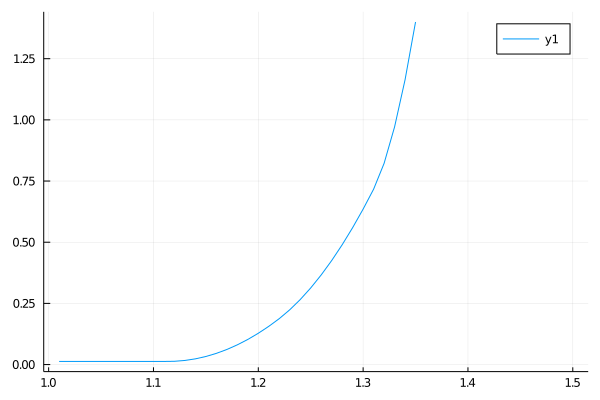

In [196]:
plot(rs, risk)

In [124]:
# Minimizing variance given minimum r value

function min_var(x̄, Σ, r)
    model = Model(Ipopt.Optimizer)
    set_optimizer_attribute(model, "max_cpu_time", 6000.0)
    set_optimizer_attribute(model, "print_level", 0)


    @variable(model, p[1:4])
    @variable(model, t)

    @objective(model, Min, p'*Σ*p)


    @constraint(model, sum(p) == 1)
    @constraint(model, p .>= 0)
    @constraint(model, x̄'*p >= r)


#     print(model)
    
    optimize!(model)
#     println("Termination status : ", termination_status(model))
#     println("Primal status      : ", primal_status(model))
    
    obj_value = objective_value(model)
    p = value.(p)
    println("Risk value for reward = $r: ",obj_value)
#     print("Portfolio composition: ",p)
    
    return obj_value
end

min_var (generic function with 1 method)

In [125]:
min_var(x̄, Σ, .1)

Risk value for reward = 0.1: 0.012814819608478446


0.012814819608478446

Risk value for reward = 1.04: 0.012814819608490416
Risk value for reward = 1.08: 0.012814819608478543
Risk value for reward = 1.12: 0.014435773073482212
Risk value for reward = 1.16: 0.07836231232006344
Risk value for reward = 1.2: 0.23700299853839102
Risk value for reward = 1.24: 0.5364720555183524
Risk value for reward = 1.28: 0.6681551472483358
Risk value for reward = 1.32: 0.8428128535485717
Risk value for reward = 1.36: 0.7536539692368286
Risk value for reward = 1.4: 0.8117769148259519
Risk value for reward = 1.44: 0.8504860758153575
Risk value for reward = 1.48: 1.0320932779610006
Risk value for reward = 1.52: 1.1090644081617294
Risk value for reward = 1.56: 1.1747276946813465
Risk value for reward = 1.6: 1.2435963190607406
Risk value for reward = 1.64: 1.2697304357005592
Risk value for reward = 1.68: 1.3339342462192465
Risk value for reward = 1.72: 1.3999961997729717
Risk value for reward = 1.76: 1.2621505296692934
Risk value for reward = 1.8: 1.5375291569441099
Risk value for r

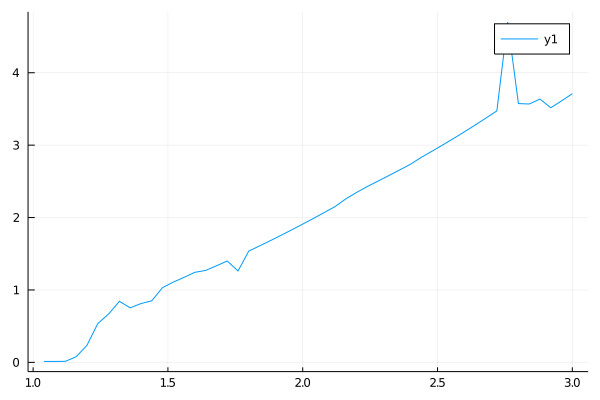

In [127]:
plot(rs, risk)

In [99]:
rs[2]

1.08